In [89]:
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow, show, subplot, figure, axis, plot, xlabel,ylabel
import warnings
warnings.filterwarnings('ignore')

# PART 1

In [132]:
#read data from .h5 file

filename = "data1.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    #data = list(f[a_group_key])
    data = np.array(f[a_group_key])



Keys: <KeysViewHDF5 ['data', 'invXForm', 'xForm']>


In [143]:
def normalize (data):
    #turn rgb to graysclae
    data_gray = np.array(data)[:,0,:,:]*0.2126 + np.array(data)[:,1,:,:]*0.7152 + np.array(data)[:,2,:,:]*0.0722
    mean = np.mean(data_gray,axis=(1,2)) #find mean
    
    for i in range (len(mean)):
        data_gray[i,:,:] -= mean[i] #remove the mean pixel intensity of each image from itself
        
    std = np.std(data_gray)  # find std
    data_gray = np.clip(data_gray, - 3 * std, 3 * std)  # clip -+3 std
    #normalize and map to 0.1 - 0.9
    minScale = 0.10
    maxScale = 0.90
    normalized = data_gray*(maxScale-minScale)/(2*np.max(data_gray))
    normalized += (minScale - np.min(normalized))
    return normalized

def random_index():
    random_index = []
    for i in range(200):
        index =random.randint(0,10239)
        random_index.append(index)
    return random_index
    

def show_images(data,random_pics):
    figure(figsize=(20,10))
    j=0
    for i in random_pics:
        j+=1
        img = (data[i]).T
        subplot(10, 20, j)
        imshow(img)
        axis("off")
    show()
    
def show_gray_images(data,random_pics):
    figure(figsize=(20,10))
    j=0
    for i in random_pics:
        j+=1
        img = (data[i]).T
        subplot(10, 20, j)
        imshow(img,cmap="gray")
        axis("off")
    show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

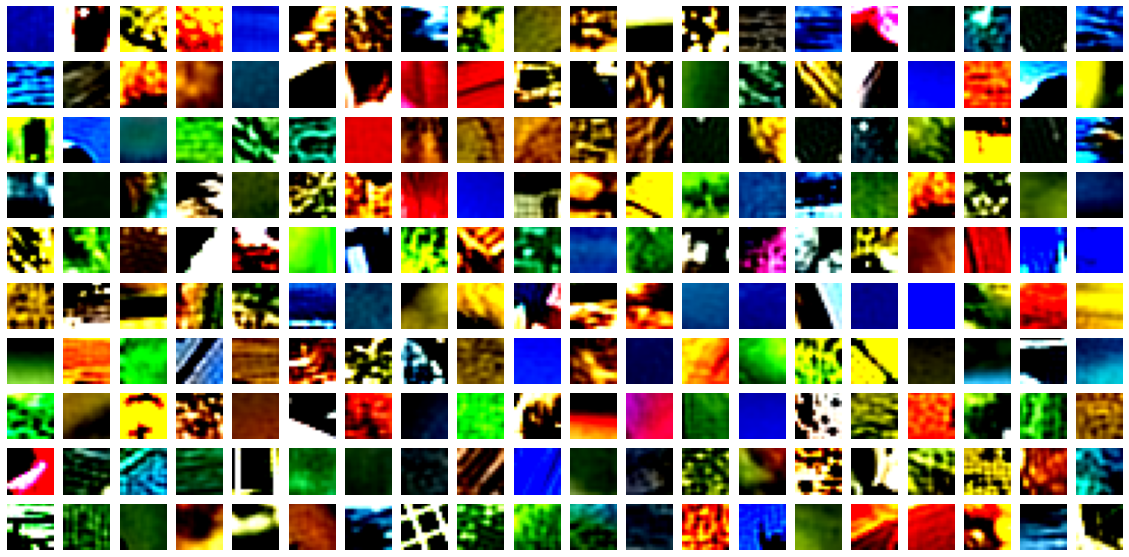

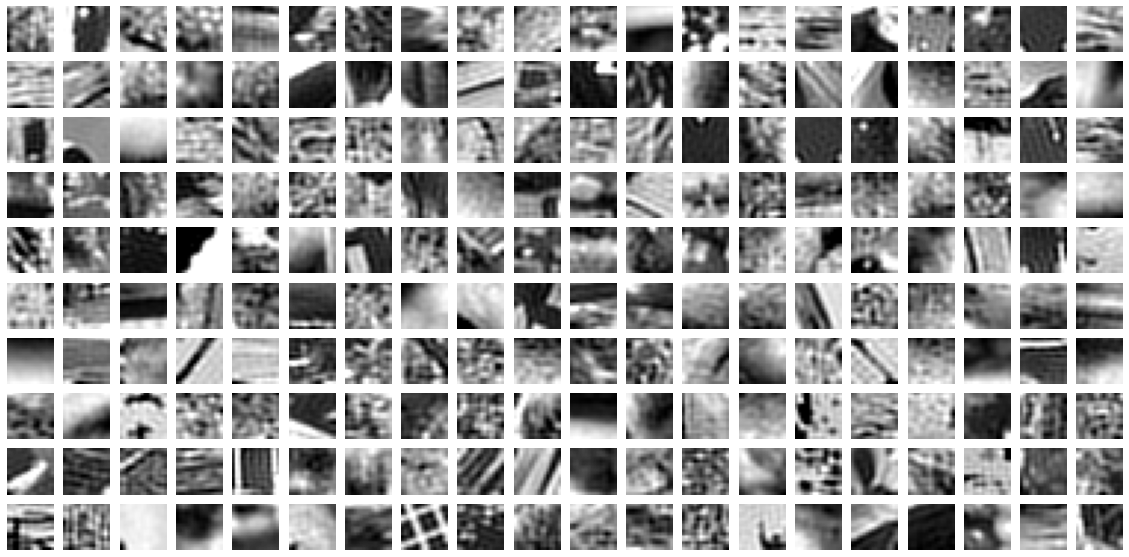

In [144]:
index = random_index()
show_images(data,index)
data_gray = normalize (data)
show_gray_images(data_gray,index)

# PART 2

In [106]:
def w0 (Lpre,Lpost):
    w0 = np.sqrt(6/(Lpre + Lpost))
    return w0

def initialize_weights(Lin, Lhid):
    
    Lout = Lin
    np.random.seed(42) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.uniform(-w0(Lin,Lhid),w0(Lin,Lhid), size = (Lin,Lhid))
    W2 = np.random.uniform(-w0(Lhid,Lout),w0(Lhid,Lout), size = (Lhid,Lout))
    b1 = np.random.uniform(-w0(1,Lhid),w0(1,Lhid), size = (1,Lhid))
    b2 = np.random.uniform(-w0(1,Lout),w0(1,Lout), size = (1,Lout))
    
    we = [W1,W2,b1,b2]
    
    return we

def initialize_params(Lin,Lhid,lmbd, beta, rho):    
    params = [Lin,Lhid,lmbd,beta,rho]
    
    return params

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def sigmoid_backward(x):
    d_sig = x*(1-x)
    return d_sig

def forward(data, we):
    
    w1,w2,b1,b2 = we

    z1 = np.dot(data,w1) + b1 #first layer linear forward
    A1 = sigmoid(z1) #first layer activation
    z2 =  np.dot(A1,w2) + b2 #output linear forward
    output = sigmoid(z2) #output layer activation

    return A1, output

def aeCost(we, data, params):
    
    Lin,Lhid,lmbd,beta,rho = params
    w1,w2,b1,b2 = we
    N = len(data)
    
    A1, output = forward(data, we)
    mean = np.mean(A1, axis=0)
    
    #calculate cost 
    average_squared_error = (1/(2*N))*np.sum((data-output)**2)
    tykhonov = (lmbd/2)*(np.sum(w1**2) + np.sum(w2**2))
    kl_divergence = beta*np.sum((rho*np.log(mean/rho))+((1-rho)*np.log((1-mean)/(1-rho))))
    J = average_squared_error + tykhonov + kl_divergence
    
    #calculate gradients 
    deltaOut = -(data-output)*sigmoid_backward(output)
    
    derKL = np.tile(beta*(-(rho/mean.T)+((1-rho)/(1-mean.T))), (10240,1)).T
    
    deltaHid = (np.dot(w2,deltaOut.T)+ derKL) * sigmoid_backward(A1).T   
    
    d_w1 = (1/N)*(np.dot(data.T,deltaHid.T) + lmbd*w1)
    d_w2 = (1/N)*(np.dot(deltaOut.T,A1).T + lmbd*w2)
    d_b1 = np.mean(deltaHid, axis=1)
    d_b2 = np.mean(deltaOut, axis=0)
    
    Jgrad = [d_w1,d_w2,d_b1,d_b2]
    
    return J, Jgrad


def backward(data, lr_rate, we, params):
    #get gradients
    J, Jgrad = aeCost(we, data, params)
    #update weights 
    we[0] -= lr_rate*Jgrad[0]
    we[1] -= lr_rate*Jgrad[1]
    we[2] -= lr_rate*Jgrad[2]
    we[3] -= lr_rate*Jgrad[3]
    return J, we

def train(data_gray,epoch,Lin,Lhid,lmbd, beta, rho):
    losses = []
    epochs = []
    data_flat = np.reshape(data_gray, (data_gray.shape[0],data_gray.shape[1]**2))
    we = initialize_weights(Lin,Lhid)
    params = initialize_params(Lin,Lhid,lmbd, beta, rho)


    for i in range (epoch):
        J, we = backward(data_flat, 0.7, we, params)
        epochs.append(i)
        losses.append(J)
        print("Epoch: {} --------------> Loss: {} ".format(i+1,J))

    return we,losses,epochs

def plot_losses(losses,epochs):
    xlabel("epoch")
    ylabel("loss")
    plot(epochs,losses)

def plot_weights(we):
    w1,w2,b1,b2 = we
    fig=figure(figsize=(18, 16))
    plot_shape = int(np.sqrt(w1.shape[1]))
    for i in range(w1.shape[1]):
        subplot(plot_shape,plot_shape,i+1)
        imshow(np.reshape(w1[:,i],(16,16)), cmap='gray')
        axis('off')
    show()

# Part 3

In [145]:
we,losses,epochs = train(data_gray,2000,256,64,5e-4, 0.01, 0.03)

Epoch: 1 --------------> Loss: 2.492712503371474 
Epoch: 2 --------------> Loss: 1.8638862452418117 
Epoch: 3 --------------> Loss: 1.8635104658731076 
Epoch: 4 --------------> Loss: 1.878322639372359 
Epoch: 5 --------------> Loss: 1.8932184239222696 
Epoch: 6 --------------> Loss: 1.9060890598362643 
Epoch: 7 --------------> Loss: 1.9168886890375336 
Epoch: 8 --------------> Loss: 1.9259286883489084 
Epoch: 9 --------------> Loss: 1.9335317470739628 
Epoch: 10 --------------> Loss: 1.9399683871987747 
Epoch: 11 --------------> Loss: 1.9454542534506332 
Epoch: 12 --------------> Loss: 1.950159259559837 
Epoch: 13 --------------> Loss: 1.9542174274526816 
Epoch: 14 --------------> Loss: 1.957735078435063 
Epoch: 15 --------------> Loss: 1.9607971912540192 
Epoch: 16 --------------> Loss: 1.9634722277890837 
Epoch: 17 --------------> Loss: 1.9658157770874556 
Epoch: 18 --------------> Loss: 1.9678733134708657 
Epoch: 19 --------------> Loss: 1.9696822960468772 
Epoch: 20 -------------->

Epoch: 159 --------------> Loss: 1.441561734953754 
Epoch: 160 --------------> Loss: 1.437576349446178 
Epoch: 161 --------------> Loss: 1.4336892209268401 
Epoch: 162 --------------> Loss: 1.4298993548279497 
Epoch: 163 --------------> Loss: 1.4262056662913476 
Epoch: 164 --------------> Loss: 1.422606986842255 
Epoch: 165 --------------> Loss: 1.4191020709227424 
Epoch: 166 --------------> Loss: 1.4156896022700163 
Epoch: 167 --------------> Loss: 1.41236820012655 
Epoch: 168 --------------> Loss: 1.409136425270817 
Epoch: 169 --------------> Loss: 1.4059927858590082 
Epoch: 170 --------------> Loss: 1.4029357430697829 
Epoch: 171 --------------> Loss: 1.3999637165454875 
Epoch: 172 --------------> Loss: 1.3970750896247586 
Epoch: 173 --------------> Loss: 1.39426821436273 
Epoch: 174 --------------> Loss: 1.3915414163362325 
Epoch: 175 --------------> Loss: 1.3888929992325871 
Epoch: 176 --------------> Loss: 1.3863212492215744 
Epoch: 177 --------------> Loss: 1.3838244391110814 
E

Epoch: 318 --------------> Loss: 1.2951116113061147 
Epoch: 319 --------------> Loss: 1.2935859304605462 
Epoch: 320 --------------> Loss: 1.2942750226121336 
Epoch: 321 --------------> Loss: 1.292789070395823 
Epoch: 322 --------------> Loss: 1.2934505888372658 
Epoch: 323 --------------> Loss: 1.2920038362701194 
Epoch: 324 --------------> Loss: 1.292637258526511 
Epoch: 325 --------------> Loss: 1.29122918962508 
Epoch: 326 --------------> Loss: 1.2918340138563542 
Epoch: 327 --------------> Loss: 1.290464106999581 
Epoch: 328 --------------> Loss: 1.2910398720246565 
Epoch: 329 --------------> Loss: 1.2897075852250157 
Epoch: 330 --------------> Loss: 1.2902538893885542 
Epoch: 331 --------------> Loss: 1.2889586485881996 
Epoch: 332 --------------> Loss: 1.2894751666040558 
Epoch: 333 --------------> Loss: 1.2882163564954998 
Epoch: 334 --------------> Loss: 1.2887028535065996 
Epoch: 335 --------------> Loss: 1.2874798106266783 
Epoch: 336 --------------> Loss: 1.2879361528838762

Epoch: 477 --------------> Loss: 1.2269900109138525 
Epoch: 478 --------------> Loss: 1.2273969322802953 
Epoch: 479 --------------> Loss: 1.2263669230018872 
Epoch: 480 --------------> Loss: 1.2268793461144625 
Epoch: 481 --------------> Loss: 1.225791356825055 
Epoch: 482 --------------> Loss: 1.2263945166264336 
Epoch: 483 --------------> Loss: 1.2252299895682244 
Epoch: 484 --------------> Loss: 1.2258982137447862 
Epoch: 485 --------------> Loss: 1.224639064474539 
Epoch: 486 --------------> Loss: 1.225339667337653 
Epoch: 487 --------------> Loss: 1.2239741904598918 
Epoch: 488 --------------> Loss: 1.2246747101410784 
Epoch: 489 --------------> Loss: 1.223202764913253 
Epoch: 490 --------------> Loss: 1.2238786452154566 
Epoch: 491 --------------> Loss: 1.2223129933352104 
Epoch: 492 --------------> Loss: 1.222952105856162 
Epoch: 493 --------------> Loss: 1.22131487408419 
Epoch: 494 --------------> Loss: 1.2219172317908495 
Epoch: 495 --------------> Loss: 1.2202335324172202 


Epoch: 633 --------------> Loss: 1.139824966180522 
Epoch: 634 --------------> Loss: 1.1406660027652502 
Epoch: 635 --------------> Loss: 1.1386882577409272 
Epoch: 636 --------------> Loss: 1.1395257918278543 
Epoch: 637 --------------> Loss: 1.137555676613476 
Epoch: 638 --------------> Loss: 1.138389377846277 
Epoch: 639 --------------> Loss: 1.13642734718778 
Epoch: 640 --------------> Loss: 1.1372568702553285 
Epoch: 641 --------------> Loss: 1.1353033921002103 
Epoch: 642 --------------> Loss: 1.1361283752142732 
Epoch: 643 --------------> Loss: 1.134183932293189 
Epoch: 644 --------------> Loss: 1.1350039955005797 
Epoch: 645 --------------> Loss: 1.1330690870893274 
Epoch: 646 --------------> Loss: 1.1338838303948258 
Epoch: 647 --------------> Loss: 1.1319589742827922 
Epoch: 648 --------------> Loss: 1.1327679755547626 
Epoch: 649 --------------> Loss: 1.1308537102506926 
Epoch: 650 --------------> Loss: 1.1316565228761308 
Epoch: 651 --------------> Loss: 1.1297534100878817 

Epoch: 791 --------------> Loss: 1.069737393762966 
Epoch: 792 --------------> Loss: 1.0731688062218672 
Epoch: 793 --------------> Loss: 1.0692060514896768 
Epoch: 794 --------------> Loss: 1.0727463805958035 
Epoch: 795 --------------> Loss: 1.0689402378758406 
Epoch: 796 --------------> Loss: 1.0724262702421712 
Epoch: 797 --------------> Loss: 1.0687111806750473 
Epoch: 798 --------------> Loss: 1.0719987570817422 
Epoch: 799 --------------> Loss: 1.0683995171099734 
Epoch: 800 --------------> Loss: 1.0713995556637554 
Epoch: 801 --------------> Loss: 1.0679912081038054 
Epoch: 802 --------------> Loss: 1.070669626812728 
Epoch: 803 --------------> Loss: 1.0675307727128671 
Epoch: 804 --------------> Loss: 1.069883933053048 
Epoch: 805 --------------> Loss: 1.06707020128191 
Epoch: 806 --------------> Loss: 1.069099483330207 
Epoch: 807 --------------> Loss: 1.0666414502384778 
Epoch: 808 --------------> Loss: 1.068340287532732 
Epoch: 809 --------------> Loss: 1.0662549046513186 


Epoch: 948 --------------> Loss: 1.0388026836204307 
Epoch: 949 --------------> Loss: 1.0355885071287732 
Epoch: 950 --------------> Loss: 1.0408444131559496 
Epoch: 951 --------------> Loss: 1.038107044147649 
Epoch: 952 --------------> Loss: 1.0437901855511063 
Epoch: 953 --------------> Loss: 1.0413763914829983 
Epoch: 954 --------------> Loss: 1.046890199130993 
Epoch: 955 --------------> Loss: 1.0442168818399578 
Epoch: 956 --------------> Loss: 1.048502271330318 
Epoch: 957 --------------> Loss: 1.0449731051874365 
Epoch: 958 --------------> Loss: 1.0474842038344423 
Epoch: 959 --------------> Loss: 1.0433175146812628 
Epoch: 960 --------------> Loss: 1.044675605248351 
Epoch: 961 --------------> Loss: 1.0406552145872168 
Epoch: 962 --------------> Loss: 1.0417743537046356 
Epoch: 963 --------------> Loss: 1.0383583450021623 
Epoch: 964 --------------> Loss: 1.039700228717608 
Epoch: 965 --------------> Loss: 1.0368806634573897 
Epoch: 966 --------------> Loss: 1.0385341486762119

Epoch: 1104 --------------> Loss: 1.0174310487431233 
Epoch: 1105 --------------> Loss: 1.0152603106918137 
Epoch: 1106 --------------> Loss: 1.017184603153718 
Epoch: 1107 --------------> Loss: 1.015022165120872 
Epoch: 1108 --------------> Loss: 1.01693871096078 
Epoch: 1109 --------------> Loss: 1.0147850207906677 
Epoch: 1110 --------------> Loss: 1.0166933705930579 
Epoch: 1111 --------------> Loss: 1.014548850828971 
Epoch: 1112 --------------> Loss: 1.0164485798368967 
Epoch: 1113 --------------> Loss: 1.0143136251016043 
Epoch: 1114 --------------> Loss: 1.0162043356096457 
Epoch: 1115 --------------> Loss: 1.0140793104677497 
Epoch: 1116 --------------> Loss: 1.0159606338350453 
Epoch: 1117 --------------> Loss: 1.0138458711084979 
Epoch: 1118 --------------> Loss: 1.0157174694080369 
Epoch: 1119 --------------> Loss: 1.0136132689128616 
Epoch: 1120 --------------> Loss: 1.0154748362344228 
Epoch: 1121 --------------> Loss: 1.0133814639046952 
Epoch: 1122 --------------> Loss:

Epoch: 1259 --------------> Loss: 0.9979909129079116 
Epoch: 1260 --------------> Loss: 0.9993409135110936 
Epoch: 1261 --------------> Loss: 0.997776372154243 
Epoch: 1262 --------------> Loss: 0.999111146350269 
Epoch: 1263 --------------> Loss: 0.9975629423900252 
Epoch: 1264 --------------> Loss: 0.9988809257252577 
Epoch: 1265 --------------> Loss: 0.9973508023769346 
Epoch: 1266 --------------> Loss: 0.9986502556593592 
Epoch: 1267 --------------> Loss: 0.9971401703100874 
Epoch: 1268 --------------> Loss: 0.9984191543698353 
Epoch: 1269 --------------> Loss: 0.9969313156429394 
Epoch: 1270 --------------> Loss: 0.9981876611547758 
Epoch: 1271 --------------> Loss: 0.996724575252963 
Epoch: 1272 --------------> Loss: 0.9979558466709035 
Epoch: 1273 --------------> Loss: 0.9965203757777288 
Epoch: 1274 --------------> Loss: 0.9977238283068397 
Epoch: 1275 --------------> Loss: 0.9963192648197422 
Epoch: 1276 --------------> Loss: 0.9974917932600686 
Epoch: 1277 --------------> Los

Epoch: 1412 --------------> Loss: 0.9852492479809195 
Epoch: 1413 --------------> Loss: 0.9833006779402985 
Epoch: 1414 --------------> Loss: 0.9849578017206404 
Epoch: 1415 --------------> Loss: 0.9830738607361914 
Epoch: 1416 --------------> Loss: 0.9846679630947381 
Epoch: 1417 --------------> Loss: 0.982847804551994 
Epoch: 1418 --------------> Loss: 0.9843788575707543 
Epoch: 1419 --------------> Loss: 0.9826218605733861 
Epoch: 1420 --------------> Loss: 0.9840899952656863 
Epoch: 1421 --------------> Loss: 0.9823958296190957 
Epoch: 1422 --------------> Loss: 0.9838012378830179 
Epoch: 1423 --------------> Loss: 0.982169921217067 
Epoch: 1424 --------------> Loss: 0.9835127551691994 
Epoch: 1425 --------------> Loss: 0.9819447069698388 
Epoch: 1426 --------------> Loss: 0.9832249780688886 
Epoch: 1427 --------------> Loss: 0.9817210775296282 
Epoch: 1428 --------------> Loss: 0.9829385600491007 
Epoch: 1429 --------------> Loss: 0.9815002155425907 
Epoch: 1430 --------------> Lo

Epoch: 1567 --------------> Loss: 0.9679492257783426 
Epoch: 1568 --------------> Loss: 0.9702228846735638 
Epoch: 1569 --------------> Loss: 0.9675132364838334 
Epoch: 1570 --------------> Loss: 0.9697602570658153 
Epoch: 1571 --------------> Loss: 0.9671115940922407 
Epoch: 1572 --------------> Loss: 0.9693257428139229 
Epoch: 1573 --------------> Loss: 0.966738485348472 
Epoch: 1574 --------------> Loss: 0.9689158031865757 
Epoch: 1575 --------------> Loss: 0.9663913883753972 
Epoch: 1576 --------------> Loss: 0.9685291657674618 
Epoch: 1577 --------------> Loss: 0.9660697057625625 
Epoch: 1578 --------------> Loss: 0.9681656576607237 
Epoch: 1579 --------------> Loss: 0.9657738968114613 
Epoch: 1580 --------------> Loss: 0.9678255932602541 
Epoch: 1581 --------------> Loss: 0.9655050639191195 
Epoch: 1582 --------------> Loss: 0.9675095685296502 
Epoch: 1583 --------------> Loss: 0.9652648427513489 
Epoch: 1584 --------------> Loss: 0.9672184784608265 
Epoch: 1585 --------------> L

Epoch: 1720 --------------> Loss: 0.9554811842700255 
Epoch: 1721 --------------> Loss: 0.9569619309474452 
Epoch: 1722 --------------> Loss: 0.9552025947741976 
Epoch: 1723 --------------> Loss: 0.9567145562034524 
Epoch: 1724 --------------> Loss: 0.9549187049253458 
Epoch: 1725 --------------> Loss: 0.9564618522849994 
Epoch: 1726 --------------> Loss: 0.9546297768674405 
Epoch: 1727 --------------> Loss: 0.9562042335648794 
Epoch: 1728 --------------> Loss: 0.9543361868402221 
Epoch: 1729 --------------> Loss: 0.955942330781293 
Epoch: 1730 --------------> Loss: 0.9540383774354638 
Epoch: 1731 --------------> Loss: 0.9556769622827218 
Epoch: 1732 --------------> Loss: 0.9537368190877739 
Epoch: 1733 --------------> Loss: 0.9554091245694715 
Epoch: 1734 --------------> Loss: 0.9534319974297356 
Epoch: 1735 --------------> Loss: 0.9551400245090744 
Epoch: 1736 --------------> Loss: 0.9531244489386718 
Epoch: 1737 --------------> Loss: 0.9548711834489306 
Epoch: 1738 --------------> L

Epoch: 1872 --------------> Loss: 0.9498856215781257 
Epoch: 1873 --------------> Loss: 0.9506175402795 
Epoch: 1874 --------------> Loss: 0.9495727163981261 
Epoch: 1875 --------------> Loss: 0.9503233513528981 
Epoch: 1876 --------------> Loss: 0.9492501000795437 
Epoch: 1877 --------------> Loss: 0.9500180944890214 
Epoch: 1878 --------------> Loss: 0.9489185136084268 
Epoch: 1879 --------------> Loss: 0.9497064201093928 
Epoch: 1880 --------------> Loss: 0.9485853207697947 
Epoch: 1881 --------------> Loss: 0.9493959565045504 
Epoch: 1882 --------------> Loss: 0.9482572443694879 
Epoch: 1883 --------------> Loss: 0.9490917591440335 
Epoch: 1884 --------------> Loss: 0.9479371974738656 
Epoch: 1885 --------------> Loss: 0.9487947491644424 
Epoch: 1886 --------------> Loss: 0.9476243903055267 
Epoch: 1887 --------------> Loss: 0.9485027483762593 
Epoch: 1888 --------------> Loss: 0.9473160526692569 
Epoch: 1889 --------------> Loss: 0.9482124563880581 
Epoch: 1890 --------------> Los

In [112]:
we,losses,epochs = train(data_nor,2000,256,16,0e-1, 0.01, 0.009)

Epoch: 1 --------------> Loss: 2.175311994231291 
Epoch: 2 --------------> Loss: 2.027609006968787 
Epoch: 3 --------------> Loss: 2.0062189296098816 
Epoch: 4 --------------> Loss: 1.997627770861714 
Epoch: 5 --------------> Loss: 1.992454864383084 
Epoch: 6 --------------> Loss: 1.9887206830143145 
Epoch: 7 --------------> Loss: 1.9857632089370476 
Epoch: 8 --------------> Loss: 1.983298718109798 
Epoch: 9 --------------> Loss: 1.9811837285195226 
Epoch: 10 --------------> Loss: 1.979336032982521 
Epoch: 11 --------------> Loss: 1.9777035738308246 
Epoch: 12 --------------> Loss: 1.9762505800415107 
Epoch: 13 --------------> Loss: 1.9749507933228792 
Epoch: 14 --------------> Loss: 1.9737839036177973 
Epoch: 15 --------------> Loss: 1.972733553531254 
Epoch: 16 --------------> Loss: 1.971786159145142 
Epoch: 17 --------------> Loss: 1.9709301784434072 
Epoch: 18 --------------> Loss: 1.9701556364474322 
Epoch: 19 --------------> Loss: 1.9694538035498395 
Epoch: 20 --------------> Los

Epoch: 161 --------------> Loss: 1.7061197140342348 
Epoch: 162 --------------> Loss: 1.7015250697602038 
Epoch: 163 --------------> Loss: 1.6969309020548315 
Epoch: 164 --------------> Loss: 1.6923390188992349 
Epoch: 165 --------------> Loss: 1.6877511802863827 
Epoch: 166 --------------> Loss: 1.683169095458821 
Epoch: 167 --------------> Loss: 1.6785944206603445 
Epoch: 168 --------------> Loss: 1.6740287573933306 
Epoch: 169 --------------> Loss: 1.6694736511654746 
Epoch: 170 --------------> Loss: 1.664930590702956 
Epoch: 171 --------------> Loss: 1.6604010076020288 
Epoch: 172 --------------> Loss: 1.6558862763871645 
Epoch: 173 --------------> Loss: 1.6513877149411686 
Epoch: 174 --------------> Loss: 1.6469065852709657 
Epoch: 175 --------------> Loss: 1.6424440945717027 
Epoch: 176 --------------> Loss: 1.638001396551481 
Epoch: 177 --------------> Loss: 1.6335795929789887 
Epoch: 178 --------------> Loss: 1.62917973541673 
Epoch: 179 --------------> Loss: 1.6248028271030717

Epoch: 322 --------------> Loss: 1.3499575711787046 
Epoch: 323 --------------> Loss: 1.3527176053505108 
Epoch: 324 --------------> Loss: 1.363222633754691 
Epoch: 325 --------------> Loss: 1.3658616789400848 
Epoch: 326 --------------> Loss: 1.3744357657923172 
Epoch: 327 --------------> Loss: 1.3613556056015548 
Epoch: 328 --------------> Loss: 1.3586872035335504 
Epoch: 329 --------------> Loss: 1.3471103100041761 
Epoch: 330 --------------> Loss: 1.3459156187882724 
Epoch: 331 --------------> Loss: 1.3423962237274227 
Epoch: 332 --------------> Loss: 1.346354284820647 
Epoch: 333 --------------> Loss: 1.346303499253953 
Epoch: 334 --------------> Loss: 1.353893477652109 
Epoch: 335 --------------> Loss: 1.3503574032163168 
Epoch: 336 --------------> Loss: 1.3547857574995155 
Epoch: 337 --------------> Loss: 1.3457394456760214 
Epoch: 338 --------------> Loss: 1.34563147911975 
Epoch: 339 --------------> Loss: 1.3391934041237974 
Epoch: 340 --------------> Loss: 1.3399697186620836 

Epoch: 480 --------------> Loss: 1.2684727741553685 
Epoch: 481 --------------> Loss: 1.2672216932573015 
Epoch: 482 --------------> Loss: 1.2678341930925032 
Epoch: 483 --------------> Loss: 1.2665960191836496 
Epoch: 484 --------------> Loss: 1.2672056374259126 
Epoch: 485 --------------> Loss: 1.2659785430899542 
Epoch: 486 --------------> Loss: 1.266587142881211 
Epoch: 487 --------------> Loss: 1.2653692672952965 
Epoch: 488 --------------> Loss: 1.2659787244607574 
Epoch: 489 --------------> Loss: 1.2647681821274386 
Epoch: 490 --------------> Loss: 1.2653803667410695 
Epoch: 491 --------------> Loss: 1.2641752562926998 
Epoch: 492 --------------> Loss: 1.2647920121282366 
Epoch: 493 --------------> Loss: 1.26359042539296 
Epoch: 494 --------------> Loss: 1.26421354771882 
Epoch: 495 --------------> Loss: 1.263013579209362 
Epoch: 496 --------------> Loss: 1.2636447916557596 
Epoch: 497 --------------> Loss: 1.2624445486141347 
Epoch: 498 --------------> Loss: 1.263085480138126 


Epoch: 640 --------------> Loss: 1.2292569256837946 
Epoch: 641 --------------> Loss: 1.2252129262028422 
Epoch: 642 --------------> Loss: 1.2287824993358183 
Epoch: 643 --------------> Loss: 1.2246726993608676 
Epoch: 644 --------------> Loss: 1.2283069437859364 
Epoch: 645 --------------> Loss: 1.2241309657936852 
Epoch: 646 --------------> Loss: 1.2278302395036047 
Epoch: 647 --------------> Loss: 1.2235877197937337 
Epoch: 648 --------------> Loss: 1.2273523676884517 
Epoch: 649 --------------> Loss: 1.2230429566026213 
Epoch: 650 --------------> Loss: 1.226873310269239 
Epoch: 651 --------------> Loss: 1.2224966723998165 
Epoch: 652 --------------> Loss: 1.2263930499028015 
Epoch: 653 --------------> Loss: 1.2219488642912202 
Epoch: 654 --------------> Loss: 1.2259115699729424 
Epoch: 655 --------------> Loss: 1.2213995302976228 
Epoch: 656 --------------> Loss: 1.2254288545892258 
Epoch: 657 --------------> Loss: 1.2208486693430365 
Epoch: 658 --------------> Loss: 1.224944888585

Epoch: 797 --------------> Loss: 1.1792076068380475 
Epoch: 798 --------------> Loss: 1.1877859155643333 
Epoch: 799 --------------> Loss: 1.1785870364007285 
Epoch: 800 --------------> Loss: 1.1872150222149036 
Epoch: 801 --------------> Loss: 1.1779664039736784 
Epoch: 802 --------------> Loss: 1.1866434204624996 
Epoch: 803 --------------> Loss: 1.1773457398558997 
Epoch: 804 --------------> Loss: 1.186071135663654 
Epoch: 805 --------------> Loss: 1.17672507431126 
Epoch: 806 --------------> Loss: 1.1854981934854252 
Epoch: 807 --------------> Loss: 1.1761044375559946 
Epoch: 808 --------------> Loss: 1.1849246198933572 
Epoch: 809 --------------> Loss: 1.1754838597462118 
Epoch: 810 --------------> Loss: 1.1843504411391228 
Epoch: 811 --------------> Loss: 1.1748633709654464 
Epoch: 812 --------------> Loss: 1.1837756837478037 
Epoch: 813 --------------> Loss: 1.1742430012122496 
Epoch: 814 --------------> Loss: 1.183200374504869 
Epoch: 815 --------------> Loss: 1.173622780387855

Epoch: 955 --------------> Loss: 1.1320753261483993 
Epoch: 956 --------------> Loss: 1.1426405443265832 
Epoch: 957 --------------> Loss: 1.1315237011329173 
Epoch: 958 --------------> Loss: 1.1420937895740804 
Epoch: 959 --------------> Loss: 1.1309734767272441 
Epoch: 960 --------------> Loss: 1.141548098615781 
Epoch: 961 --------------> Loss: 1.1304246536529383 
Epoch: 962 --------------> Loss: 1.1410034777819378 
Epoch: 963 --------------> Loss: 1.1298772323099067 
Epoch: 964 --------------> Loss: 1.1404599329579255 
Epoch: 965 --------------> Loss: 1.1293312127943433 
Epoch: 966 --------------> Loss: 1.139917469600099 
Epoch: 967 --------------> Loss: 1.1287865949169602 
Epoch: 968 --------------> Loss: 1.139376092752217 
Epoch: 969 --------------> Loss: 1.1282433782214372 
Epoch: 970 --------------> Loss: 1.1388358070624105 
Epoch: 971 --------------> Loss: 1.127701562002999 
Epoch: 972 --------------> Loss: 1.1382966168005915 
Epoch: 973 --------------> Loss: 1.127161145327074

Epoch: 1109 --------------> Loss: 1.0936050406152873 
Epoch: 1110 --------------> Loss: 1.1038366244970594 
Epoch: 1111 --------------> Loss: 1.09315792265813 
Epoch: 1112 --------------> Loss: 1.1033798744554206 
Epoch: 1113 --------------> Loss: 1.0927121856408748 
Epoch: 1114 --------------> Loss: 1.1029247266425184 
Epoch: 1115 --------------> Loss: 1.0922678395763592 
Epoch: 1116 --------------> Loss: 1.1024712597212052 
Epoch: 1117 --------------> Loss: 1.091824896488433 
Epoch: 1118 --------------> Loss: 1.1020195693512034 
Epoch: 1119 --------------> Loss: 1.0913833708189369 
Epoch: 1120 --------------> Loss: 1.1015697727139218 
Epoch: 1121 --------------> Loss: 1.0909432799111312 
Epoch: 1122 --------------> Loss: 1.1011220144709493 
Epoch: 1123 --------------> Loss: 1.0905046445785416 
Epoch: 1124 --------------> Loss: 1.1006764746906303 
Epoch: 1125 --------------> Loss: 1.0900674897653828 
Epoch: 1126 --------------> Loss: 1.1002333795100074 
Epoch: 1127 --------------> Los

KeyboardInterrupt: 

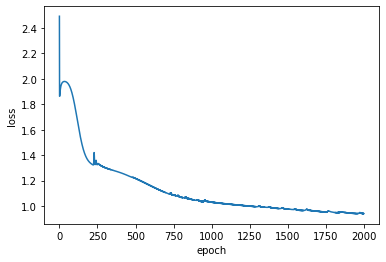

In [120]:
plot_losses(losses,epochs)

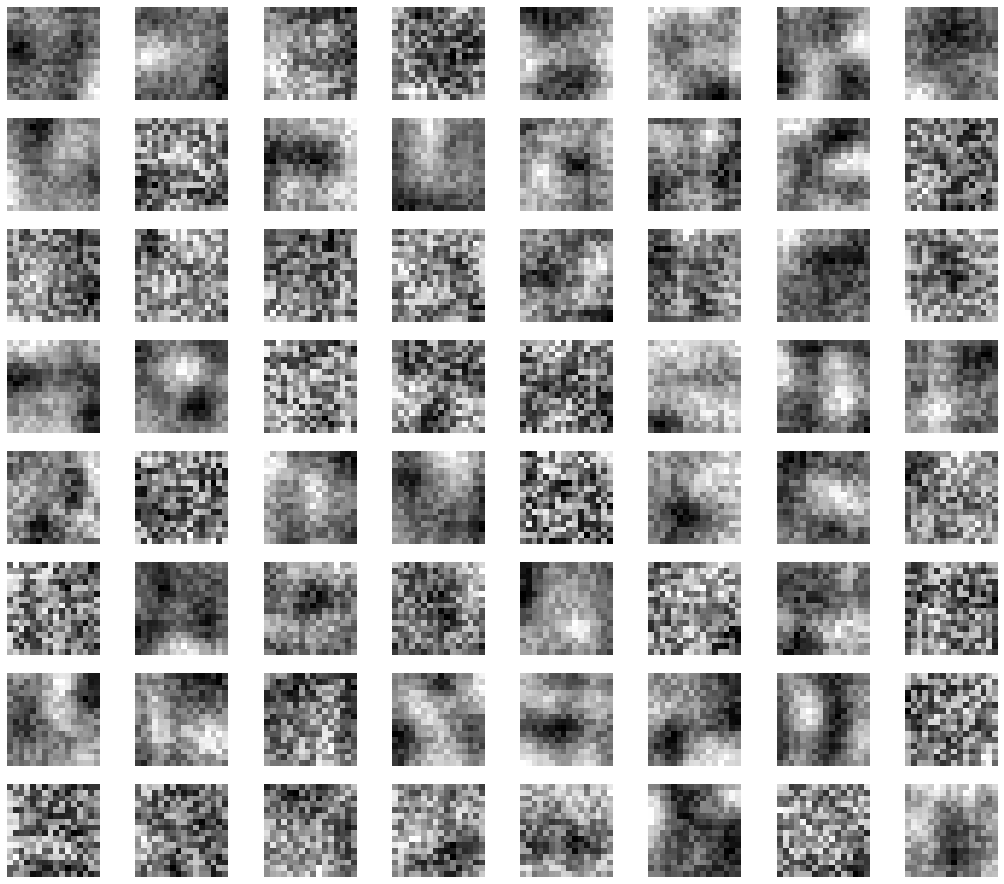

In [121]:
plot_weights(we)